In [1]:
"""
Template for week 8 project in Data Visualization

Compute county centers from an SVG image of USA that includes county boundaries
Output a CSV file with FIPS code and county centers
"""

import math
import csv
from xml.dom import minidom
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Resource paths
PLOTS_PATH = "plots/"
DATA_PATH = "data/"

ATTRIBUTES = {}


In [3]:
################################################################################
# Provided code

def dist(vert1, vert2):
    """
    Input: Tuples vert1, vert2 of floats
    
    Output: Euclidean distance between vert1 and vert2
    """
    return math.sqrt((vert1[0] - vert2[0]) ** 2 + (vert1[1] - vert2[1]) ** 2)

In [4]:
def compute_verts_center(verts):
    """
    Input: List verts of vertices (tuples of two floats) on a path
    
    Output: Estimated center of the path as a tuple of two floats
    
    NOTE: Does not include an edge from the last vertex back to the first vertex
    """
    centroid = [0, 0]
    perimeter = 0
    for idx in range(len(verts) - 1):
        edge_length = dist(verts[idx], verts[idx + 1])
        centroid[0] += 0.5 * (verts[idx][0] + verts[idx + 1][0]) * edge_length
        centroid[1] += 0.5 * (verts[idx][1] + verts[idx + 1][1]) * edge_length
        perimeter += edge_length
    
    if perimeter == 0:
        center = verts[0]
    else:
        center = ((centroid[0] / perimeter), (centroid[1] / perimeter))
    return center

In [5]:
#########################################################################
# Part 1 - Extract and display the "d" attribute of path elements in XML

def get_path_attributes(xml_file):
    """
    Input: String xml_file corresponding to an xml file containing a sequence of path elements
    
    Output: Dictionary whose keys are "id" attributes (FIPS code)
    and whose values are the corresponding "d" attributes (county boundary as a string)
    """
    result = {}
    
    dom = minidom.parse(xml_file)
    
    nodelist = dom.getElementsByTagName("path")
    for node in nodelist:
        atrr_id = node.getAttribute("id")
        atrr_d = node.getAttribute("d")
        result[atrr_id] = atrr_d
    
    return result     

In [6]:
def test_get_path_attributes():
    """
    Output: Dictionary with three examples computed via get_path_attributes()
    """
    
    ATTRIBUTES["simple"] = get_path_attributes(DATA_PATH + "simple.xml")
    print("Extracted", len(ATTRIBUTES["simple"]), "unique paths")
    print("Paths are", ATTRIBUTES["simple"])
    
    ATTRIBUTES["worldmap"] = get_path_attributes(DATA_PATH + "Worldmap_northern.svg")
    print("Extracted", len(ATTRIBUTES["worldmap"]), "unique paths")
    
    ATTRIBUTES["usamap"] = get_path_attributes(DATA_PATH + "USA_counties.svg")
    print("Extracted", len(ATTRIBUTES["usamap"]), "unique paths")

    
test_get_path_attributes()

Extracted 3 unique paths
Paths are {'path1': 'M 0.0,0.0 L 1.0,2.0', 'path2': 'M 0.0,0.0 L 2.0,0.0 L 2.0,1.0 L 0.0,1.0 L 0.0,0.0', 'path3': 'M 1.0,2.0 L 2.0,1.0 L 1.0,1.0 L 1.0,2.0 z M 1.0,2.0 2.0,2.0 2.0,1.0 L 1.0,2.0'}
Extracted 1142 unique paths
Extracted 3143 unique paths


Correct output
~~~~
Extracted 3 unique paths
Paths are {'path1': 'M 0.0,0.0 L 1.0,2.0', 'path2': 'M 0.0,0.0 L 2.0,0.0 L 2.0,1.0 L 0.0,1.0 L 0.0,0.0', 'path3': 'M 1.0,2.0 L 2.0,1.0 L 1.0,1.0 L 1.0,2.0 z M 1.0,2.0 2.0,2.0 2.0,1.0 L 1.0,2.0'}
Extracted 1142 unique paths
Extracted 3143 unique paths
~~~~

In [7]:
def get_d_verts(path_d, commands=('M', 'L', 'Z', 'z')):
    """
    Input: String path_d correspond to the "d" attribute of a path element
    
    Output: List of vertices (tuples of floats) for corresponding path
    
    NOTE: Ignores absolute path commands in path_d by default. Some floats may 
    include the character "e" due to scientific notation.
    """
    result = []
    
    for command in commands:
        path_d = path_d.replace(command, "")
        
    for element in path_d.split(" "):
        if element == "":
            pass
        else:
            verts = element.split(",")
            v_1 = float(verts[0])
            v_2 = float(verts[1])
            result.append((v_1, v_2))
    
    return result

In [8]:
def test_get_d_verts():
    """ Test get_d_verts() """
    
    simple_attributes = ATTRIBUTES["simple"]
    for path_id in simple_attributes:
        path_d = simple_attributes[path_id]
        print(path_d)
        print(get_d_verts(path_d))
        print()
        
    # Problematic case in XML for USA map - there maybe no space between numbers and commands
    path_d = "M 54.34898,214.1M 53.80398,205.321 L 53.75898,205.288"
    print(path_d)
    print(get_d_verts(path_d))
    print()
    
test_get_d_verts()

M 0.0,0.0 L 1.0,2.0
[(0.0, 0.0), (1.0, 2.0)]

M 0.0,0.0 L 2.0,0.0 L 2.0,1.0 L 0.0,1.0 L 0.0,0.0
[(0.0, 0.0), (2.0, 0.0), (2.0, 1.0), (0.0, 1.0), (0.0, 0.0)]

M 1.0,2.0 L 2.0,1.0 L 1.0,1.0 L 1.0,2.0 z M 1.0,2.0 2.0,2.0 2.0,1.0 L 1.0,2.0
[(1.0, 2.0), (2.0, 1.0), (1.0, 1.0), (1.0, 2.0), (1.0, 2.0), (2.0, 2.0), (2.0, 1.0), (1.0, 2.0)]

M 54.34898,214.1M 53.80398,205.321 L 53.75898,205.288
[(54.34898, 214.1), (53.80398, 205.321), (53.75898, 205.288)]



Correct output
~~~~
M 0.0,0.0 L 1.0,2.0
[(0.0, 0.0), (1.0, 2.0)]

M 0.0,0.0 L 2.0,0.0 L 2.0,1.0 L 0.0,1.0 L 0.0,0.0
[(0.0, 0.0), (2.0, 0.0), (2.0, 1.0), (0.0, 1.0), (0.0, 0.0)]

M 1.0,2.0 L 2.0,1.0 L 1.0,1.0 L 1.0,2.0 z M 1.0,2.0 2.0,2.0 2.0,1.0 L 1.0,2.0
[(1.0, 2.0), (2.0, 1.0), (1.0, 1.0), (1.0, 2.0), (1.0, 2.0), (2.0, 2.0), (2.0, 1.0), (1.0, 2.0)]

M 54.34898,214.1M 53.80398,205.321 L 53.75898,205.288
[(54.34898, 214.1), (53.80398, 205.321), (53.75898, 205.288)]

~~~~

In [9]:
def plot_paths(path_attributes, title="Paths extracted from an XML file"):
    """
    Input: Dictionary whose items are (path_id, path_d) pairs
    
    Output: matplotlib figure consisting of plot of 
    the corresponding paths encoded by the string path_d
    """
    
    fig, axs = plt.subplots()
    
    verts = []
    path = {}
    
    for path_id, path_d in path_attributes.items():
        d_verts = get_d_verts(path_d)
        verts.append(d_verts)
        x_path = []
        y_path = []
        for v_x, v_y in d_verts:
            x_path.append(v_x)
            y_path.append(v_y)
        path[path_id] = (x_path, y_path)

    for path in path.values():
        axs.plot(path[0], path[1])

    plt.title(title)
    axs.set_aspect('equal')
    
    return fig

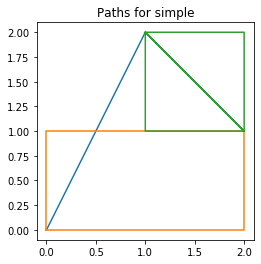

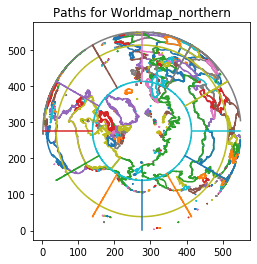

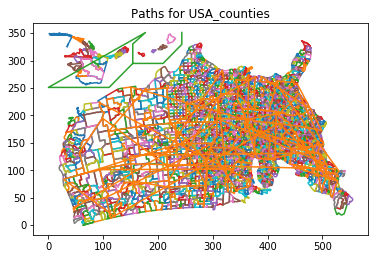

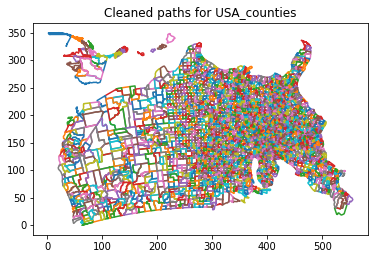

In [10]:
def test_plot_paths():
    """ Test plot_paths() """

    simple_attributes = ATTRIBUTES["simple"]
    plot_paths(simple_attributes, "Paths for simple")
    
    worldmap_attributes = ATTRIBUTES["worldmap"]
    plot_paths(worldmap_attributes, "Paths for Worldmap_northern")
    
    usamap_attributes = ATTRIBUTES["usamap"]
    plot_paths(usamap_attributes, "Paths for USA_counties")
    
    # Add to remove unnecessary paths from usamap_attributes
    usamap_attributes.pop("State_Lines", None)
    usamap_attributes.pop("separator", None)
    plot_paths(usamap_attributes, "Cleaned paths for USA_counties")
    
test_plot_paths()

In [37]:
##############################################################################                                
# Part 2 - Create pandas dataframe for centers of paths and plots its contents

def make_centers_df(path_attributes):
    """
    Input: Dictionary path_attributes with items (path_id, path_d)
    
    Output: Dataframe with index path_id and columns x_coord, and
    y_coord where (x_coord, y_coord) is center of path encoded by path_d 
    """
    
    result = []
    path_id_list = []
    
    for path_id, path_d in path_attributes.items():
        path_id_list.append(path_id)
        d_verts = get_d_verts(path_d)
        center = compute_verts_center(d_verts)
        result.append(list(center))
   
    return pd.DataFrame(result, index=path_id_list, columns=["x_coord", "y_coord"])

In [39]:
def write_centers_df(centers_df, file_name):
    """
    Input: Dataframe centers_df, string file_name
    
    Action: Write dataframe to specified file
    
    NOTE: The output file should have no headers
    """
    
    return centers_df.to_csv(file_name, header=None)

In [45]:
def plot_centers_df(centers_df, title="Path centers"):
    """
    Input: Dataframe centers_df
    
    Output: matplotlib figure consisting of plot of
    centers of counties using pandas scatter()
    """

    fig = centers_df.plot.scatter(x='x_coord', y='y_coord', title=title)
    fig.set_aspect("equal")
    
    return fig

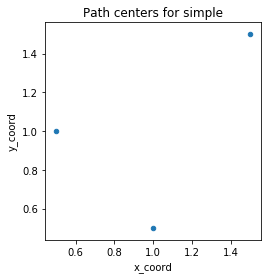

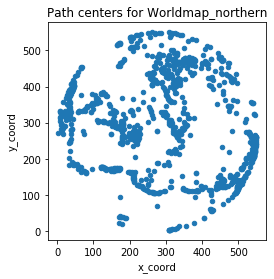

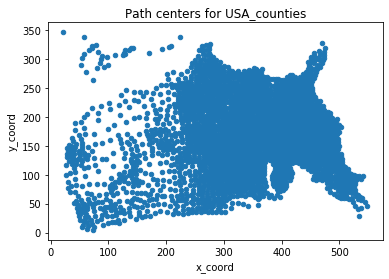

In [46]:
def test_centers_df():
    """ Test path centers dataframe code """

    simple_attributes = ATTRIBUTES["simple"]
    simple_df = make_centers_df(simple_attributes)
    #print(simple_df)
    write_centers_df(simple_df, DATA_PATH + "simple.csv")
    plot_centers_df(simple_df, "Path centers for simple")
    
    worldmap_attributes = ATTRIBUTES["worldmap"]
    worldmap_df = make_centers_df(worldmap_attributes)
    #print(worldmap_df.head())
    write_centers_df(worldmap_df, DATA_PATH + "Worldmap_northern.csv")
    plot_centers_df(worldmap_df, "Path centers for Worldmap_northern")

    usamap_attributes = ATTRIBUTES["usamap"]
    usamap_df = make_centers_df(usamap_attributes)
    #print(usamap_df.head())
    write_centers_df(usamap_df, DATA_PATH + "USA_counties.csv")
    plot_centers_df(usamap_df, "Path centers for USA_counties")          
    # Note that plot is inverted on y-axis since SVG origin is upper left

test_centers_df()